# Exploring Single vs. Differential Pricing Strategies for Revenue Optimization

## Introduction

This notebook explores two key pricing strategies: Single Pricing and Differential Pricing. Through these analyses, we aim to understand how different pricing models can affect a business's revenue and evaluate the optimal prices to charge customers.

## Content Overview

1. **Single Pricing Strategy**: 
   - Generate a distribution of customer willingness to pay (WTP) using a logistic distribution.
   - Identify potential price points based on customer WTP.
   - Calculate the demand and revenue at each price point.
   - Find the optimal single price that maximizes revenue.

2. **Differential Pricing Strategy**: 
   - Explore scenarios where the business can charge two or more prices, tailoring prices to different segments of customers.
   - Utilize optimization techniques to find the optimal set of prices for 2 to 10 price strategies.
   - Analyze the associated revenues with each price differentiation strategy.

3. **Visual Comparisons**: 
   - Plot the revenue curves for different pricing strategies to illustrate the relationship between the number of price points and total revenue.
   - Compare the differential pricing with the single pricing strategy to highlight potential revenue gains.

## Objectives

- **Understanding Pricing Dynamics**: Investigate how pricing strategies can influence customer demand and total revenue.
- **Optimal Price Determination**: Analyze different methods to identify optimal price points that align with specific business strategies.
- **Comparative Analysis**: Compare different pricing strategies to understand their impact on revenue and derive insights that can guide real-world pricing decisions.

## Target Audience

This analysis is designed for students, researchers, and professionals interested in pricing and revenue analytics. It provides a foundation for understanding key pricing concepts and offers practical insights through computational methods.

## Note

Please ensure that the required libraries and dependencies are installed to run this notebook smoothly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

In [2]:
def generate_wtp(mean, std_dev, size=1000):
    """Generate random samples of customer willingness to pay (WTP) assuming logistic distribution.
    
    Parameters:
        mean (float): Mean value of WTP.
        std_dev (float): Standard deviation of WTP.
        size (int): Number of samples to generate.
    
    Returns:
        np.array: A truncated array of customer WTP.
    """
    WTP = np.random.logistic(loc=mean, scale=std_dev, size=size) # logistic distribution
    return np.maximum(WTP, 0)  # Truncate values at zero


## Single Pricing Strategy: Finding the Optimal Price to Maximize Revenue

In a single pricing strategy, every customer is charged the same price for a product, regardless of their individual willingness to pay (WTP). Here's how we approach finding the optimal single price to maximize revenue:

1. **Generate Possible Prices**: Based on the minimum and maximum WTP, we generate a list of possible prices that the business can charge, incremented by 10 cents.

2. **Calculate Demand**: For each price in the list, we calculate the demand, i.e., the number of customers whose WTP is greater than or equal to that price.

3. **Calculate Revenue**: For each price, we multiply the price by the corresponding demand to calculate the revenue that would be generated at that price point.

4. **Find the Optimal Price**: We evaluate the revenues for all the price points in our list and identify the price that generates the highest revenue. This price is considered the optimal price for the single pricing strategy.

5. **Plot the Revenue Curve**: We can also plot the revenue curve as a function of price to visually analyze how changes in price affect revenue. The peak of this curve corresponds to the optimal price.

6. **Comparison with Differential Pricing**: The revenue from the single pricing strategy can be compared with revenues from various differential pricing strategies to analyze the benefits and trade-offs of different approaches.

The single pricing strategy serves as a baseline for comparison with more complex, segmented pricing strategies. By understanding how revenue varies with price in the single-price context, we can appreciate the potential advantages of employing differential pricing to better match prices with individual customers' WTP.

In [3]:
def generate_prices(WTP, step=0.10):
    """Generate a list of prices based on the willingness to pay (WTP).
    
    Parameters:
        WTP (np.array): Array of customer WTP.
        step (float): Step size for generating the prices.
    
    Returns:
        np.array: List of potential prices.
    """
    min_price = np.floor(min(WTP))
    max_price = np.ceil(max(WTP))
    return np.arange(min_price, max_price, step)


In [4]:
def calculate_demand_and_revenue(WTP, prices):
    """Calculate demand and revenue at each price point and find the optimal price.
    
    Parameters:
        WTP (np.array): Array of customer WTP.
        prices (np.array): List of potential prices.
    
    Returns:
        tuple: Optimal price, maximum revenue, demands, and revenues lists.
    """
    optimal_price = 0
    max_revenue = 0
    demands = []
    revenues = []
    
    for price in prices:
        demand = sum(WTP >= price)
        revenue = demand * price
        demands.append(demand)
        revenues.append(revenue)
        
        if revenue > max_revenue:
            max_revenue = revenue
            optimal_price = price

    return optimal_price, max_revenue, demands, revenues


In [5]:
def plot_wtp_distribution(WTP, bins=50):
    """Plot the distribution of customer willingness to pay (WTP).
    
    Parameters:
        WTP (np.array): Array of customer WTP.
        bins (int): Number of bins for the histogram.
    """
    plt.hist(WTP, bins=bins, alpha=0.5)
    plt.title('Distribution of Customer Willingness to Pay (WTP)')
    plt.xlabel('Willingness to Pay')
    plt.ylabel('Frequency')
    plt.show()


In [6]:
def plot_revenue_vs_price(prices, revenues, optimal_price):
    """Plot revenue curve against price for single pricing strategy.
    
    Parameters:
        prices (np.array): List of potential prices.
        revenues (np.array): List of corresponding revenues.
        optimal_price (float): Optimal price for maximum revenue.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(prices, revenues, label='Revenue Curve')
    plt.axvline(x=optimal_price, color='r', linestyle='--', label='Optimal Price')
    plt.xlabel('Price')
    plt.ylabel('Revenue')
    plt.title('Revenue vs Price for Single Pricing Strategy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [8]:
# Implement single pricing strategy
mean = 50
std_dev = 10
WTP = generate_wtp(mean, std_dev)
prices = generate_prices(WTP)
optimal_price, max_revenue, demands, revenues = calculate_demand_and_revenue(WTP, prices)

print(f"The optimal single price is ${optimal_price:.2f}, and it generates a revenue of ${max_revenue:.2f}.")

The optimal single price is $39.10, and it generates a revenue of $29911.50.


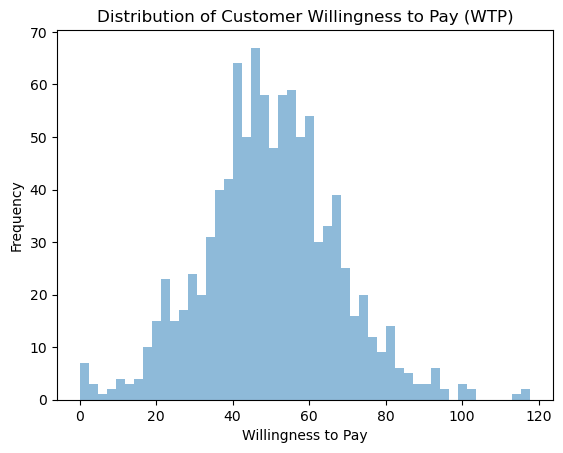

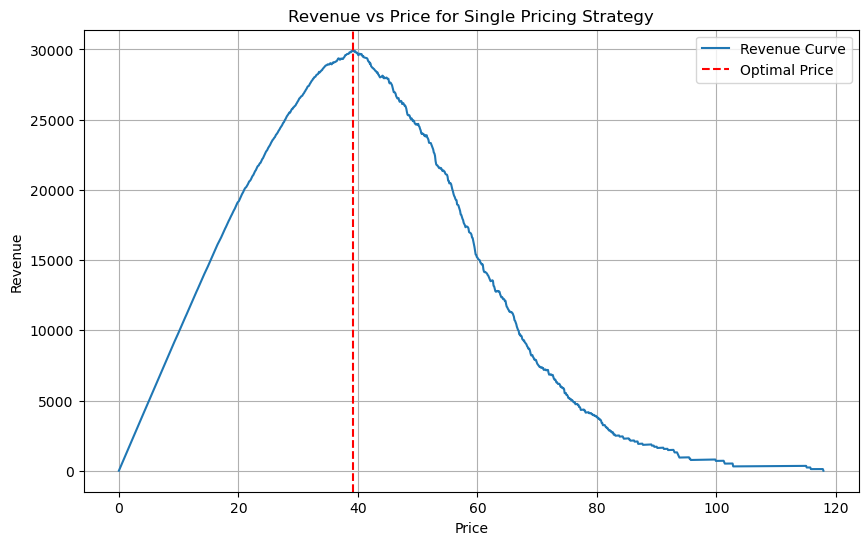

In [9]:
plot_wtp_distribution(WTP)
plot_revenue_vs_price(prices, revenues, optimal_price)

## Differential Pricing Strategies: Finding Optimal Price Points to Maximize Total Revenue

The goal of differential pricing is to segment customers according to their willingness to pay (WTP) and charge different prices to different segments to maximize total revenue. Here's how we approach finding the optimal price points for different strategies:

1. **Define the Objective Function**: The objective function calculates the total revenue for a given set of prices. We want to find the prices that maximize this revenue.

2. **Customer Segmentation**: The WTP values are sorted in descending order, and the customers are divided into segments according to the number of price points chosen. For example, if we have a two-price strategy, we divide the customers into two equal-sized segments.

3. **Calculate Segment Revenue**: For each segment, we calculate the revenue by multiplying the number of customers willing to pay at or above the given price by the price itself. We sum the revenues from all segments to get the total revenue.

4. **Optimization Method**: We use an optimization technique to find the prices that maximize the total revenue. This involves iteratively adjusting the prices and evaluating the objective function until we find the values that provide the maximum revenue.

5. **Constraints and Boundaries**: While not implemented in the basic version of this analysis, further refinement might include specific constraints or boundaries on the prices, reflecting real-world business rules and market conditions.

6. **Repeat for Different Strategies**: We repeat this process for different numbers of price points (e.g., 2-price strategy, 3-price strategy) to understand how the number of differentiated prices impacts total revenue.

7. **Comparison with Single Pricing**: Finally, we compare the revenues from the differential pricing strategies with the revenue from a single-price strategy to illustrate how differential pricing can improve revenue.

This method enables us to find the optimal price points that align with different business strategies, allowing for an analytical exploration of various pricing policies and their impact on revenue.

---

## The process of designing a differential pricing strategy

### Step 1: Understanding the Problem

We have a customer base with a given willingness to pay (WTP) following a logistic distribution. The goal is to divide the customers into different segments and find the optimal price for each segment to maximize revenue.

### Step 2: Defining the Strategy

The single price strategy gives one price for all customers. The differential pricing strategy will divide customers into segments and set an optimal price for each segment. If done correctly, this should allow for more nuanced pricing that better captures customer WTP, thereby maximizing revenue.

### Step 3: Creating the Segments

One approach could be to sort the WTP and then divide customers into equal-sized segments. Each segment can have a different price.

### Step 4: Defining the Objective Function

We'll create an objective function that takes the segment prices as input and returns the total revenue for the given prices. The total revenue will be the sum of the revenue from each segment, which is the price for that segment times the number of customers in the segment with WTP greater or equal to that price.

### Step 5: Implementing the Optimization

We will use an optimization algorithm to find the prices that maximize the total revenue. We must also ensure that the optimal prices found for the differential pricing strategy are higher than the single price strategy.

### Step 6: Code Implementation

Let's try to implement the above logic.

In [10]:
def total_revenue(prices, sorted_WTP):
    """Objective function to minimize for finding optimal differential prices.
    
    Parameters:
        prices (np.array): Array of prices for different segments.
        sorted_WTP (np.array): Sorted array of customer WTP.
    
    Returns:
        float: Negative total revenue.
    """
    revenue = 0
    segment_size = len(sorted_WTP) // len(prices)
    for i, price in enumerate(prices):
        segment = sorted_WTP[i * segment_size: (i + 1) * segment_size]
        segment_revenue = sum(wtp >= price for wtp in segment) * price
        revenue += segment_revenue
    return -revenue


In [11]:
def find_optimal_differential_prices(WTP, min_price_strategy=2, max_price_strategy=10):
    """Find optimal prices for differential pricing strategies.
    
    Parameters:
        WTP (np.array): Array of customer WTP.
        min_price_strategy (int): Minimum number of price strategies to consider.
        max_price_strategy (int): Maximum number of price strategies to consider.
    
    Returns:
        dict: Optimal prices and revenues for different numbers of pricing strategies.
    """
    sorted_WTP = np.sort(WTP)
    min_price = np.floor(min(WTP))
    max_price = np.ceil(max(WTP))
    bounds = [(min_price, max_price)] * max_price_strategy
    optimal_prices = {}

    for num_prices in range(min_price_strategy, max_price_strategy + 1):
        result = differential_evolution(total_revenue, bounds[:num_prices], args=(sorted_WTP,))
        optimal_prices[num_prices] = {'prices': result.x, 'revenue': -result.fun}
    
    return optimal_prices


In [12]:
# Finding the optimal differential prices
optimal_differential_prices = find_optimal_differential_prices(WTP)
optimal_differential_prices

{2: {'prices': array([31.57298827, 49.56408534]), 'revenue': 36337.7563749342},
 3: {'prices': array([29.55129332, 42.77792491, 56.75168469]),
  'revenue': 39467.336768726746},
 4: {'prices': array([20.27006264, 39.63478533, 49.57504611, 59.77354004]),
  'revenue': 41421.47577503827},
 5: {'prices': array([20.98544754, 36.63202874, 45.1789109 , 53.68900114, 63.36642108]),
  'revenue': 43005.03129461169},
 6: {'prices': array([18.91501869, 34.20881988, 42.73916966, 48.33528858, 56.05450216,
         65.85635509]),
  'revenue': 43512.09391858498},
 7: {'prices': array([18.3707959 , 32.55675901, 40.96974145, 46.21717753, 51.63192871,
         57.54722457, 66.48976339]),
  'revenue': 43936.81923149348},
 8: {'prices': array([19.68158658, 30.59022156, 38.03163466, 44.62175228, 49.36036103,
         54.93292545, 60.09358346, 66.95517079]),
  'revenue': 44693.73352084863},
 9: {'prices': array([18.49834333, 28.91272198, 37.43397443, 41.91942364, 47.11142741,
         51.61268291, 55.87669384,

In [13]:
def plot_differential_pricing_revenue(optimal_prices):
    """Plot total revenue for different numbers of pricing strategies.
    
    Parameters:
        optimal_prices (dict): Optimal prices and revenues for different numbers of pricing strategies.
    """
    strategies = list(optimal_prices.keys())
    revenues = [v['revenue'] for v in optimal_prices.values()]

    plt.figure(figsize=(10, 6))
    plt.plot(strategies, revenues, marker='o', linestyle='-', color='b', label='Differential Pricing')
    plt.axhline(y=max_revenue, color='r', linestyle='--', label='Single Pricing')
    plt.xlabel('Number of Price Strategies')
    plt.ylabel('Total Revenue')
    plt.title('Total Revenue vs Number of Price Strategies')
    plt.xticks(strategies)
    plt.grid(True)
    plt.legend()
    plt.show()


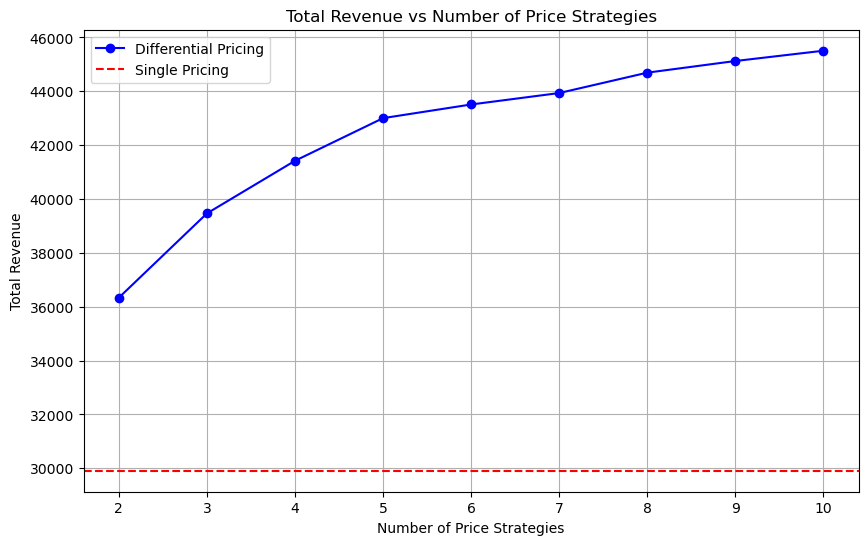

In [14]:
plot_differential_pricing_revenue(optimal_differential_prices)

## Conclusion

### Key Findings

1. **Single Pricing Strategy**: We explored a single pricing strategy where all customers are charged the same price. The optimal price was identified that maximizes revenue under this approach, serving as a benchmark for comparison with differential pricing.

2. **Differential Pricing Strategy**: We then analyzed a differential pricing strategy, dividing customers into different segments based on their willingness to pay (WTP) and finding optimal prices for each segment. This approach allowed us to capture more of the available customer surplus, resulting in higher revenues for strategies with more price points.

3. **Visualization Insights**: The plots provided a vivid representation of how revenue changes with price in both single and differential pricing strategies. The visualization aids in understanding the impact of different pricing tactics.

### Implications

- **Revenue Maximization**: Differential pricing, when implemented correctly, can lead to higher revenues compared to a single pricing strategy. The ability to tailor prices to different customer segments enables better alignment with customer WTP.

- **Strategic Pricing Considerations**: The analysis demonstrates the importance of understanding customer WTP and the market context when designing pricing strategies. The choice between single and differential pricing must be considered in light of business objectives, customer behavior, and operational constraints.

- **Optimization Techniques**: The application of optimization algorithms, such as differential evolution, provided a robust method to find the optimal set of prices under different scenarios. These techniques can be applied to more complex pricing models in real-world settings.

### Limitations and Future Work

- **Model Complexity**: The analysis was based on a simplified model of customer behavior. In reality, factors such as competitive landscape, market trends, and customer segmentation might further influence pricing dynamics.

- **Data Considerations**: The simulated data was based on a logistic distribution for WTP. More accurate analysis might be conducted using real-world data or more sophisticated demand models.

- **Advanced Pricing Strategies**: Further research could explore more nuanced pricing strategies such as dynamic pricing, bundle pricing, or personalized pricing that can be more tailored to specific business contexts.

### Final Thoughts

This notebook provides an in-depth analysis of pricing strategies, illustrating the trade-offs and opportunities in selecting different pricing approaches. By leveraging mathematical modeling and optimization techniques, we gain insights into how pricing decisions can impact revenue, offering valuable lessons for business strategy and decision-making.